<a href="https://colab.research.google.com/github/mishad01/Data-Science-Machine-Learning/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ml_data/Bangladeshi University Students Mental Health.csv")
data

#Descriptive Analysis

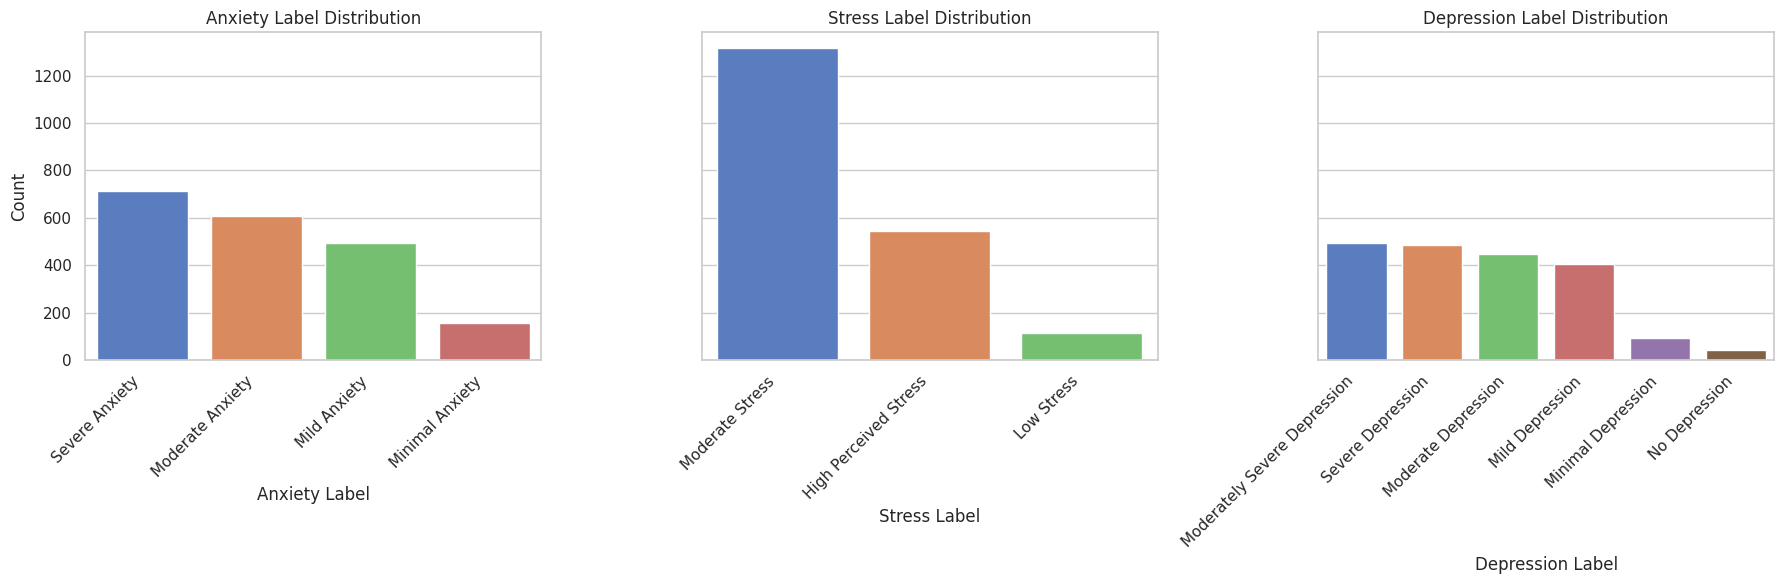

In [ ]:

# Set visualization style
sns.set(style="whitegrid")

# 1. Mental Health Labels Distribution
label_columns = ['Anxiety Label', 'Stress Label', 'Depression Label']
label_distributions = {label: data[label].value_counts() for label in label_columns}

# Plot Mental Health Label Distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, label in enumerate(label_columns):
    sns.barplot(
        x=label_distributions[label].index,
        y=label_distributions[label].values,
        ax=axes[idx],
        palette="muted"
    )
    axes[idx].set_title(f"{label} Distribution")
    axes[idx].set_ylabel("Count")
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()




In [ ]:
data.columns

Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ',
       '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ',
       '3. In a semester, how often have you had trouble relaxing due to academic pressure? ',
       '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?',
       '5. In a semester, how often have you worried too much about academic affairs? ',
       '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?',
       '7. In a semester, how often have you felt afraid, as if something awful might happen?',
       'Anxiety Value', 'Anxiety Label',
       '1. In a semester, how often have you felt upset due

# Age and Gender Distribution

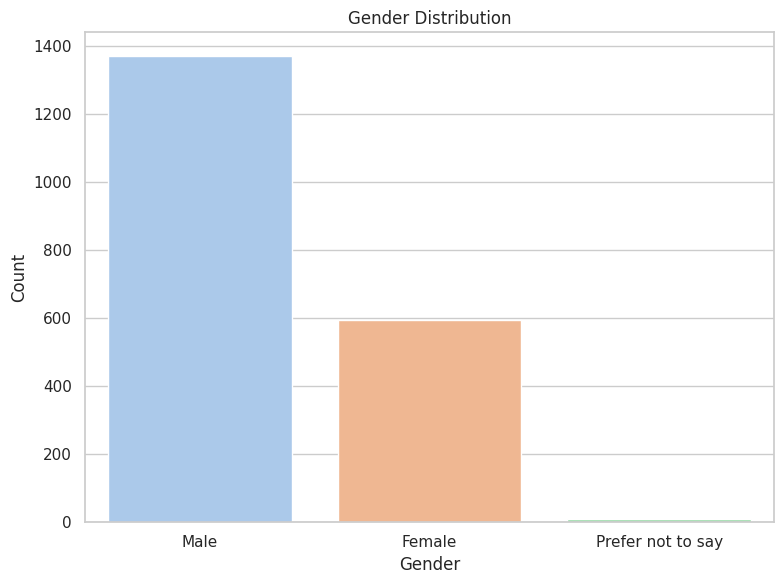

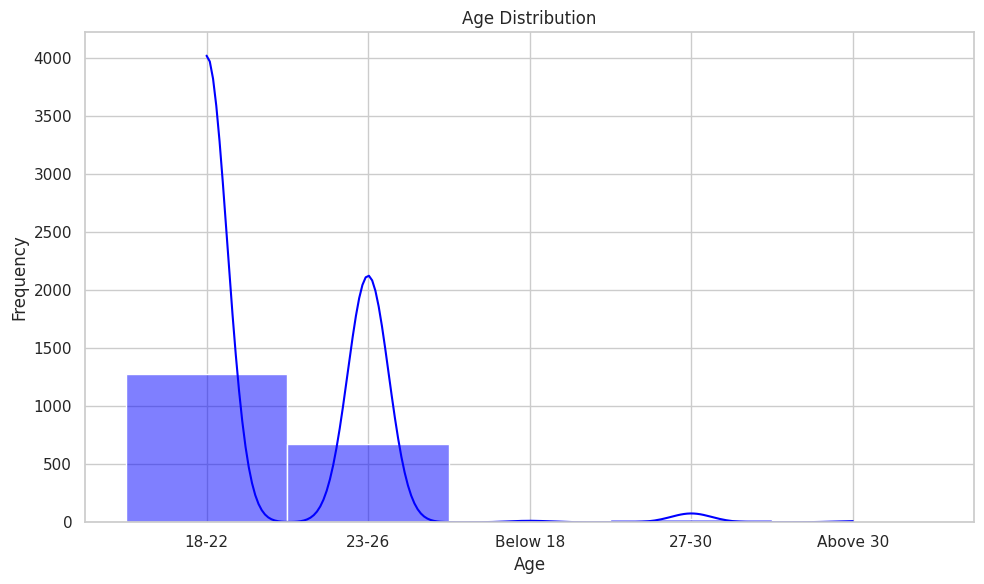

In [ ]:
# Gender Distribution
gender_column = '2. Gender'
gender_distribution = data[gender_column].value_counts()

# Plot Gender Distribution
plt.figure(figsize=(8, 6))
sns.barplot(
    x=gender_distribution.index,
    y=gender_distribution.values,
    palette="pastel"
)
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.tight_layout()  # Adjust layout to add space
plt.show()
print()

# Age Distribution
age_column = '1. Age'

# Plot Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[age_column], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()  # Adjust layout to add space
plt.show()


#CGPA vs Mental Health Scores

In [ ]:
# Transform CGPA ranges into approximate values
def approximate_cgpa(cgpa_range):
    if cgpa_range == "2.50 - 2.99":
        return 2.745
    elif cgpa_range == "3.80 - 4.00":
        return 3.90
    elif cgpa_range == "3.00 - 3.39":
        return 3.195
    elif cgpa_range == "3.40 - 3.79":
        return 3.595
    else:
        return None

data['Approximate CGPA'] = data['6. Current CGPA'].apply(approximate_cgpa)

# Display the updated dataset
#print(data[['6. Current CGPA', 'Approximate CGPA']].head())
#data['Approximate CGPA']
cgpa_column = data['Approximate CGPA'];



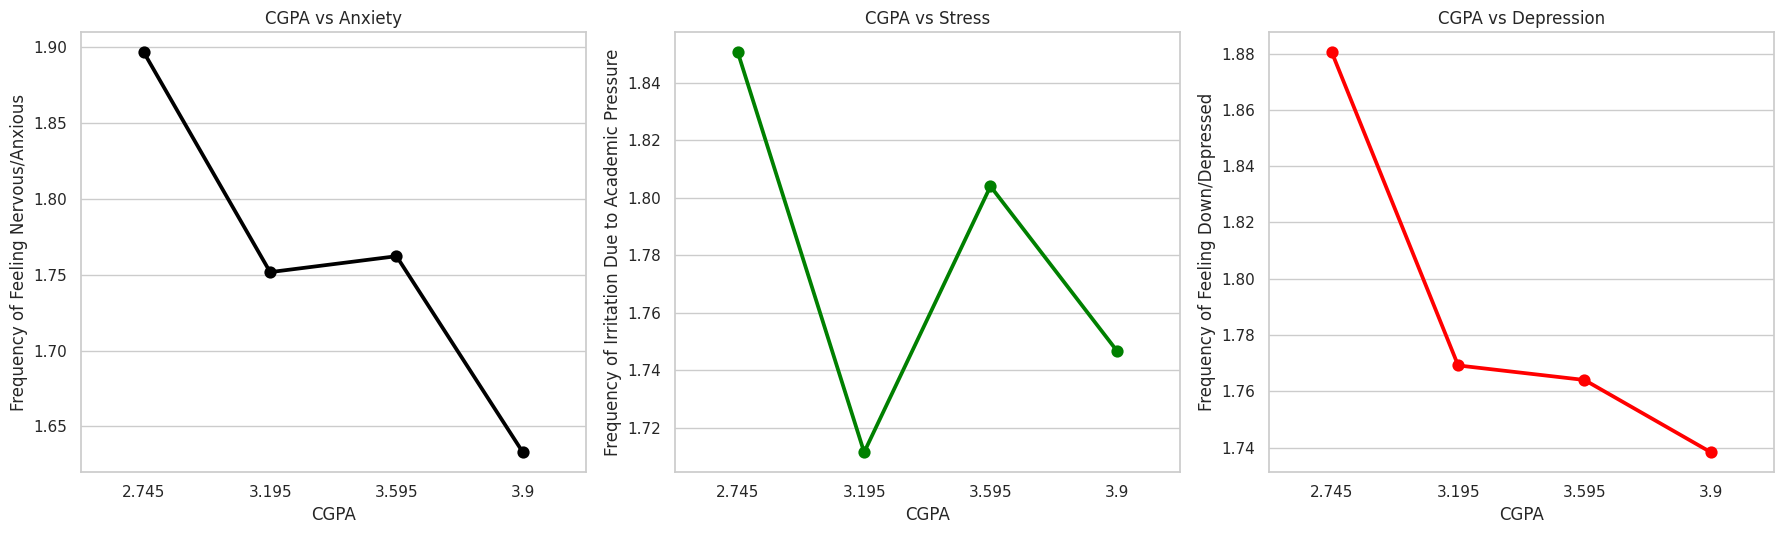

In [ ]:
# Define columns
cgpa_column = 'Approximate CGPA'
anxiety_column = '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? '
stress_column = '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?'
depression_column = '2. In a semester, how often have you been feeling down, depressed or hopeless?'

# Plot scatter plots for CGPA vs. each mental health indicator
fig, axes = plt.subplots(1, 3, figsize=(18, 5.5))

# CGPA vs Anxiety
#sns.violinplot(data=data, x=cgpa_column, y=anxiety_column, ax=axes[0], palette='rainbow')
sns.pointplot(data=data, x=cgpa_column, y=anxiety_column, ax=axes[0], color="black", ci=None, markers="o")
axes[0].set_title("CGPA vs Anxiety")
axes[0].set_xlabel("CGPA")
axes[0].set_ylabel("Frequency of Feeling Nervous/Anxious")

# CGPA vs Stress
sns.pointplot(data=data, x=cgpa_column, y=stress_column, ax=axes[1],  color="green", ci=None, markers="o")
axes[1].set_title("CGPA vs Stress")
axes[1].set_xlabel("CGPA")
axes[1].set_ylabel("Frequency of Irritation Due to Academic Pressure")

# CGPA vs Depression
sns.pointplot(data=data, x=cgpa_column, y=depression_column, ax=axes[2], color="red",ci=None, markers="o")
axes[2].set_title("CGPA vs Depression")
axes[2].set_xlabel("CGPA")
axes[2].set_ylabel("Frequency of Feeling Down/Depressed")

plt.tight_layout()
plt.show()

#Correlation Heatmap

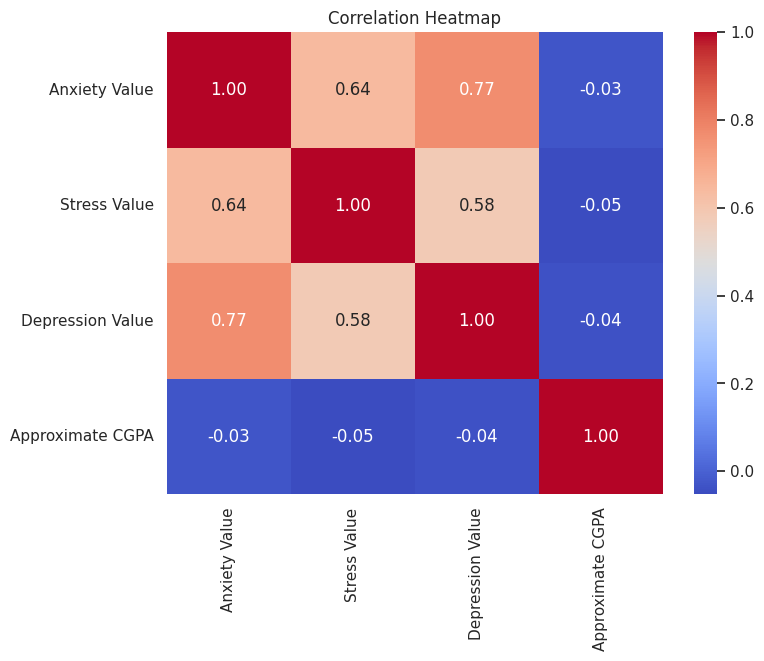

In [ ]:
# Ensure correct column names
correlation_data = data[['Anxiety Value', 'Stress Value', 'Depression Value', 'Approximate CGPA']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


#Clustering

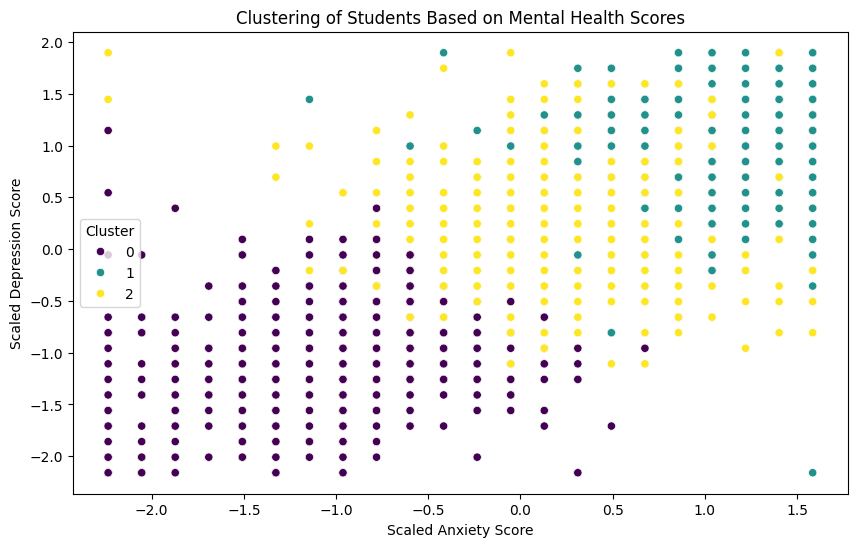

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = data[['Anxiety Value', 'Stress Value', 'Depression Value']]

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0],  # Scaled Anxiety Score
    y=scaled_features[:, 2],  # Scaled Depression Score
    hue=data['Cluster'],
    palette='viridis'
)
plt.title("Clustering of Students Based on Mental Health Scores")
plt.xlabel("Scaled Anxiety Score")
plt.ylabel("Scaled Depression Score")
plt.legend(title="Cluster")
plt.show()


#Trend Analysis
Cumulative Anxiety/Stress Trends Over Semesters
Ensure that the column 'Semester' is in a numerical or sortable format (e.g., integers or ordered categorical type) for proper trend plotting.

In [ ]:
# Group by semester for cumulative trends
semester_anxiety_trend = data.groupby('Semester')['Anxiety Value'].mean()
semester_stress_trend = data.groupby('Semester')['Stress Value'].mean()

# Plot cumulative trends over semesters
plt.figure(figsize=(12, 6))
plt.plot(semester_anxiety_trend, marker='o', label='Anxiety Trend', color='blue')
plt.plot(semester_stress_trend, marker='o', label='Stress Trend', color='green')
plt.title("Cumulative Anxiety and Stress Trends Over Semesters")
plt.xlabel("Semester")
plt.ylabel("Average Score")
plt.legend()
plt.grid()
plt.show()


KeyError: 'Semester'

#Comparison of Academic vs Personal Contexts
Ensure 'Context (Academic/Personal)' column exists with values like "Academic" and "Personal."

In [ ]:
# Comparison of academic vs personal contexts
context_group = data.groupby('Context (Academic/Personal)')[['Anxiety Value', 'Stress Value']].mean()

# Plot bar chart for academic vs personal contexts
context_group.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title("Mental Health Scores in Academic vs Personal Contexts")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.legend(["Anxiety", "Stress"])
plt.show()


KeyError: 'Context (Academic/Personal)'

#7. Predictive Insights
Using Linear Regression to Predict Anxiety Levels
The predictive model is straightforward and effective for regression.

Mean Squared Error: 10.299165656026423
R-squared Value: 0.626975983289932


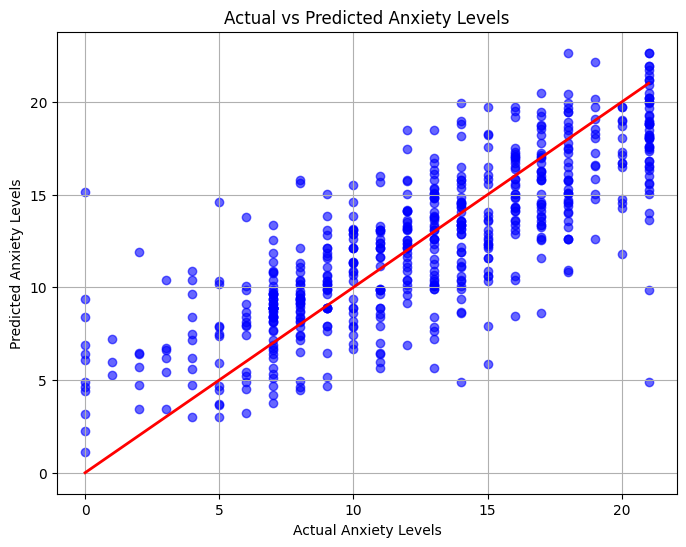

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features (Depression, Stress) and target (Anxiety)
X = data[['Depression Value', 'Stress Value']]
y = data['Anxiety Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Value:", r2)

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Actual vs Predicted Anxiety Levels")
plt.xlabel("Actual Anxiety Levels")
plt.ylabel("Predicted Anxiety Levels")
plt.grid()
plt.show()


8. Highlighting Critical Cases
Defining and Visualizing Critical Cases
Set thresholds for identifying severe cases. Adjust values (>= 4) as per data range.

Number of Critical Cases: 1973


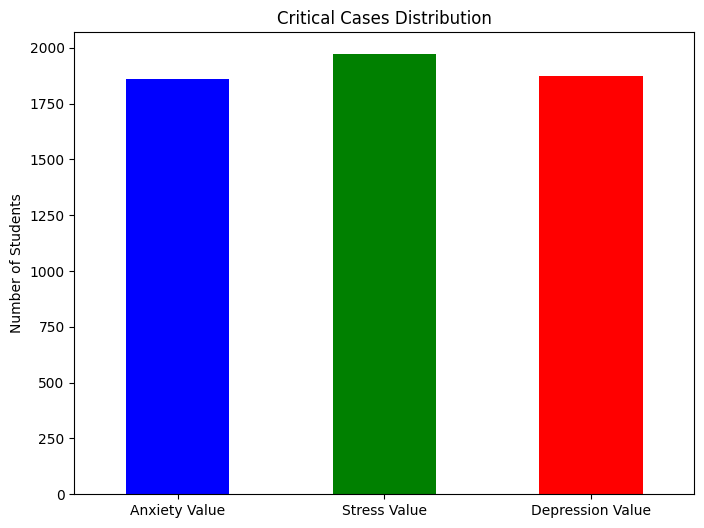

In [ ]:
# Define thresholds for critical cases
severe_anxiety_threshold = 4  # Example threshold for severe anxiety
high_stress_threshold = 4     # Example threshold for high stress
severe_depression_threshold = 4  # Example threshold for severe depression

# Filter critical cases
critical_cases = data[
    (data['Anxiety Value'] >= severe_anxiety_threshold) |
    (data['Stress Value'] >= high_stress_threshold) |
    (data['Depression Value'] >= severe_depression_threshold)
]

print("Number of Critical Cases:", critical_cases.shape[0])

# Display critical cases (example: top 10)
critical_cases.head(10)

# Save critical cases to a file for further analysis
critical_cases.to_csv("Critical_Cases.csv", index=False)

# Visualize critical cases distribution
plt.figure(figsize=(8, 6))
critical_count = critical_cases[['Anxiety Value', 'Stress Value', 'Depression Value']].apply(
    lambda x: (x >= 4).sum(), axis=0
)
critical_count.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title("Critical Cases Distribution")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.show()
